<a href="https://colab.research.google.com/github/RevazRevazashvili/DataScience_learning/blob/main/medical_insurance_cost_prediction_linear_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('Train_Data.csv')

In [12]:
data.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


# Data preprocessing

In [13]:
data['sex'] = data['sex'].astype('category')
data['sex'] = data['sex'].cat.codes
data['smoker'] = data['smoker'].astype('category')
data['smoker'] = data['smoker'].cat.codes

In [20]:
col_dr = ['region', 'charges']
X = data.drop(columns=col_dr)

In [21]:
X

,age,sex,bmi,smoker,children
0,21.000000,1,25.745000,0,2
1,36.976978,0,25.744165,1,3
2,18.000000,1,30.030000,0,1
3,37.000000,1,30.676891,0,3
4,58.000000,1,32.010000,0,1
...,...,...,...,...,...
3625,48.820767,0,41.426984,0,4
3626,38.661977,0,26.202557,0,2
3627,56.000000,1,40.300000,0,0
3628,48.061207,0,34.930624,0,1


In [22]:
y = data['charges']

In [23]:
y

0        3279.868550
1       21454.494239
2        1720.353700
3        6801.437542
4       11946.625900
            ...     
3625    10987.324964
3626    11735.844352
3627    10602.385000
3628     8976.140452
3629     7027.698968
Name: charges, Length: 3630, dtype: float64

In [24]:
X.describe()

,age,sex,bmi,smoker,children
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,0.558953,30.629652,0.154270,2.503581
std,12.151029,0.496581,5.441307,0.361257,1.712568
min,18.000000,0.000000,15.960000,0.000000,0.000000
25%,29.000000,0.000000,26.694526,0.000000,1.000000
50%,39.170922,1.000000,30.200000,0.000000,3.000000
75%,48.343281,1.000000,34.100000,0.000000,4.000000
max,64.000000,1.000000,53.130000,1.000000,5.000000


In [25]:
X.isna().sum()

age         0
sex         0
bmi         0
smoker      0
children    0
dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train

,age,sex,bmi,smoker,children
929,22.250446,1,26.053817,0,5
3587,52.000000,1,32.708144,0,3
3586,21.000000,1,25.700000,1,4
2344,44.905618,0,33.651275,0,1
1352,41.903118,1,26.143243,1,1
...,...,...,...,...,...
1130,53.376109,1,37.059947,1,3
1294,41.000000,0,32.600000,0,3
860,45.000000,1,30.360000,1,0
3507,23.488199,0,22.778120,0,3


In [28]:
y_train

929      4900.321448
3587    11312.474463
3586    17942.106000
2344     7443.847665
1352    38239.411582
            ...     
1130    46412.533236
1294     7954.517000
860     62592.873090
3507     4343.586409
3174     9875.680400
Name: charges, Length: 2904, dtype: float64

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()

In [31]:
lr.fit(X_train, y_train)

LinearRegression()

In [33]:
c = lr.intercept_
c

-10611.637179945388

In [35]:
m = lr.coef_
m

array([  236.77769599,  1182.95097381,   287.26540041, 22768.22959697,
         461.10209078])

In [36]:
y_pred_train = lr.predict(X_train)

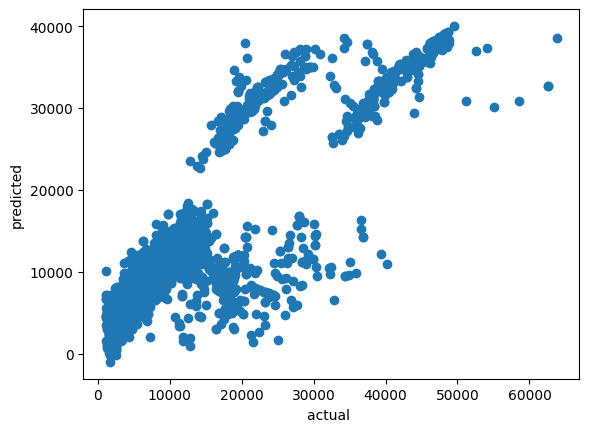

In [38]:
plt.scatter(y_train, y_pred_train)
plt.xlabel("actual ")
plt.ylabel("predicted")
plt.show()

In [39]:
from sklearn.metrics import r2_score

In [42]:
print(f"{round(r2_score(y_train, y_pred_train),2)*100.0}% of model correctness")

71.0% of model correctness


# using trained model to predict cost

In [44]:
test_data = pd.read_csv('Test_Data.csv')

In [45]:
test_data.head()

,age,sex,bmi,smoker,region,children
0,40.000000,male,29.900000,no,southwest,2
1,47.000000,male,32.300000,no,southwest,1
2,54.000000,female,28.880000,no,northeast,2
3,37.000000,male,30.568094,no,northeast,3
4,59.130049,male,33.132854,yes,northeast,4


In [46]:
test_data['sex'] = test_data['sex'].astype('category')
test_data['sex'] = test_data['sex'].cat.codes
test_data['smoker'] = test_data['smoker'].astype('category')
test_data['smoker'] = test_data['smoker'].cat.codes

In [47]:
XT = test_data.drop(columns='region')

In [48]:
XT

,age,sex,bmi,smoker,children
0,40.000000,1,29.900000,0,2
1,47.000000,1,32.300000,0,1
2,54.000000,0,28.880000,0,2
3,37.000000,1,30.568094,0,3
4,59.130049,1,33.132854,1,4
...,...,...,...,...,...
487,51.000000,1,27.740000,0,1
488,33.000000,1,42.400000,0,5
489,47.769999,1,29.064615,0,4
490,41.530738,0,24.260852,0,5


In [49]:
XT.isna().sum()

age         0
sex         0
bmi         0
smoker      0
children    0
dtype: int64

In [51]:
predicted_outcomes = lr.predict(XT)

In [52]:
test_data['predicted_outcome'] = predicted_outcomes

In [54]:
test_data.head()

,age,sex,bmi,smoker,region,children,predicted_outcome
0,40.000000,1,29.900000,0,southwest,2,9553.861287
1,47.000000,1,32.300000,0,southwest,1,11439.640029
2,54.000000,0,28.880000,0,northeast,2,11392.787349
3,37.000000,1,30.568094,0,northeast,3,9496.550443
4,59.130049,1,33.132854,1,northeast,4,38702.550919
